## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.386152  1.035888 -0.469657 -0.386228  1.718429 -0.488970
1  0.556171 -0.423648 -0.899195  0.346005  0.306546  0.661344
2 -0.804060  0.467254  1.408014  0.189050  1.786269  0.861535
3 -0.934088 -0.182289  0.448335  0.920510 -1.123702 -0.516724
4  1.019080  1.595359 -0.706119 -1.507550 -1.416537 -1.049736


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8909845	total: 58.3ms	remaining: 58.3s
1:	learn: 0.8809178	total: 58.9ms	remaining: 29.4s
2:	learn: 0.8724226	total: 59.5ms	remaining: 19.8s
3:	learn: 0.8625260	total: 60ms	remaining: 14.9s
4:	learn: 0.8558560	total: 60.4ms	remaining: 12s
5:	learn: 0.8490201	total: 60.8ms	remaining: 10.1s
6:	learn: 0.8419420	total: 61.4ms	remaining: 8.71s
7:	learn: 0.8351560	total: 61.9ms	remaining: 7.68s
8:	learn: 0.8269162	total: 62.6ms	remaining: 6.89s
9:	learn: 0.8200397	total: 63.1ms	remaining: 6.25s
10:	learn: 0.8125456	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8048392	total: 64.2ms	remaining: 5.29s
12:	learn: 0.7975828	total: 64.8ms	remaining: 4.92s
13:	learn: 0.7898768	total: 65.3ms	remaining: 4.59s
14:	learn: 0.7834316	total: 65.7ms	remaining: 4.31s
15:	learn: 0.7781796	total: 66.1ms	remaining: 4.06s
16:	learn: 0.7719676	total: 66.5ms	remaining: 3.85s
17:	learn: 0.7648964	total: 66.9ms	remaining: 3.65s
18:	learn: 0.7582305	total: 67.3ms	remaining: 3.

108:	learn: 0.3844434	total: 109ms	remaining: 890ms
109:	learn: 0.3812878	total: 110ms	remaining: 886ms
110:	learn: 0.3788572	total: 110ms	remaining: 880ms
111:	learn: 0.3765180	total: 110ms	remaining: 875ms
112:	learn: 0.3731973	total: 111ms	remaining: 870ms
113:	learn: 0.3710065	total: 111ms	remaining: 865ms
114:	learn: 0.3686392	total: 112ms	remaining: 859ms
115:	learn: 0.3665238	total: 112ms	remaining: 854ms
116:	learn: 0.3632508	total: 113ms	remaining: 850ms
117:	learn: 0.3604305	total: 113ms	remaining: 845ms
118:	learn: 0.3583038	total: 115ms	remaining: 850ms
119:	learn: 0.3556498	total: 115ms	remaining: 846ms
120:	learn: 0.3527436	total: 116ms	remaining: 841ms
121:	learn: 0.3499929	total: 116ms	remaining: 836ms
122:	learn: 0.3481745	total: 117ms	remaining: 832ms
123:	learn: 0.3458079	total: 117ms	remaining: 827ms
124:	learn: 0.3434948	total: 118ms	remaining: 823ms
125:	learn: 0.3411677	total: 118ms	remaining: 819ms
126:	learn: 0.3388585	total: 119ms	remaining: 815ms
127:	learn: 

262:	learn: 0.1320933	total: 187ms	remaining: 523ms
263:	learn: 0.1310947	total: 187ms	remaining: 523ms
264:	learn: 0.1302745	total: 188ms	remaining: 521ms
265:	learn: 0.1292507	total: 188ms	remaining: 520ms
266:	learn: 0.1282152	total: 189ms	remaining: 519ms
267:	learn: 0.1272472	total: 190ms	remaining: 518ms
268:	learn: 0.1263276	total: 190ms	remaining: 517ms
269:	learn: 0.1253862	total: 191ms	remaining: 516ms
270:	learn: 0.1245014	total: 192ms	remaining: 515ms
271:	learn: 0.1234206	total: 192ms	remaining: 514ms
272:	learn: 0.1224041	total: 193ms	remaining: 513ms
273:	learn: 0.1212270	total: 193ms	remaining: 512ms
274:	learn: 0.1204292	total: 194ms	remaining: 510ms
275:	learn: 0.1195842	total: 194ms	remaining: 509ms
276:	learn: 0.1186111	total: 195ms	remaining: 508ms
277:	learn: 0.1175794	total: 195ms	remaining: 507ms
278:	learn: 0.1166954	total: 196ms	remaining: 506ms
279:	learn: 0.1158057	total: 196ms	remaining: 505ms
280:	learn: 0.1149299	total: 197ms	remaining: 503ms
281:	learn: 

478:	learn: 0.0337172	total: 293ms	remaining: 318ms
479:	learn: 0.0334902	total: 293ms	remaining: 318ms
480:	learn: 0.0333539	total: 294ms	remaining: 317ms
481:	learn: 0.0330806	total: 295ms	remaining: 317ms
482:	learn: 0.0328867	total: 295ms	remaining: 316ms
483:	learn: 0.0327552	total: 296ms	remaining: 315ms
484:	learn: 0.0325376	total: 296ms	remaining: 314ms
485:	learn: 0.0323487	total: 296ms	remaining: 314ms
486:	learn: 0.0322128	total: 297ms	remaining: 313ms
487:	learn: 0.0320577	total: 298ms	remaining: 312ms
488:	learn: 0.0318481	total: 298ms	remaining: 311ms
489:	learn: 0.0316724	total: 298ms	remaining: 311ms
490:	learn: 0.0315251	total: 299ms	remaining: 310ms
491:	learn: 0.0314012	total: 299ms	remaining: 309ms
492:	learn: 0.0312471	total: 300ms	remaining: 308ms
493:	learn: 0.0310715	total: 300ms	remaining: 308ms
494:	learn: 0.0309517	total: 301ms	remaining: 307ms
495:	learn: 0.0308337	total: 301ms	remaining: 306ms
496:	learn: 0.0306814	total: 302ms	remaining: 306ms
497:	learn: 

635:	learn: 0.0163947	total: 370ms	remaining: 212ms
636:	learn: 0.0163637	total: 371ms	remaining: 211ms
637:	learn: 0.0162656	total: 371ms	remaining: 211ms
638:	learn: 0.0162169	total: 372ms	remaining: 210ms
639:	learn: 0.0161652	total: 372ms	remaining: 209ms
640:	learn: 0.0160997	total: 373ms	remaining: 209ms
641:	learn: 0.0160168	total: 373ms	remaining: 208ms
642:	learn: 0.0159524	total: 374ms	remaining: 207ms
643:	learn: 0.0158594	total: 374ms	remaining: 207ms
644:	learn: 0.0158092	total: 375ms	remaining: 206ms
645:	learn: 0.0157596	total: 375ms	remaining: 206ms
646:	learn: 0.0156756	total: 376ms	remaining: 205ms
647:	learn: 0.0156264	total: 376ms	remaining: 204ms
648:	learn: 0.0155781	total: 377ms	remaining: 204ms
649:	learn: 0.0155298	total: 377ms	remaining: 203ms
650:	learn: 0.0154825	total: 378ms	remaining: 202ms
651:	learn: 0.0154058	total: 378ms	remaining: 202ms
652:	learn: 0.0153380	total: 379ms	remaining: 201ms
653:	learn: 0.0152715	total: 379ms	remaining: 201ms
654:	learn: 

844:	learn: 0.0072713	total: 476ms	remaining: 87.4ms
845:	learn: 0.0072374	total: 477ms	remaining: 86.8ms
846:	learn: 0.0072292	total: 477ms	remaining: 86.2ms
847:	learn: 0.0071943	total: 478ms	remaining: 85.7ms
848:	learn: 0.0071603	total: 478ms	remaining: 85ms
849:	learn: 0.0071296	total: 479ms	remaining: 84.5ms
850:	learn: 0.0071102	total: 479ms	remaining: 83.9ms
851:	learn: 0.0070879	total: 480ms	remaining: 83.3ms
852:	learn: 0.0070651	total: 480ms	remaining: 82.7ms
853:	learn: 0.0070322	total: 481ms	remaining: 82.2ms
854:	learn: 0.0070105	total: 481ms	remaining: 81.6ms
855:	learn: 0.0069799	total: 482ms	remaining: 81ms
856:	learn: 0.0069612	total: 482ms	remaining: 80.4ms
857:	learn: 0.0069401	total: 482ms	remaining: 79.8ms
858:	learn: 0.0069180	total: 483ms	remaining: 79.2ms
859:	learn: 0.0068964	total: 483ms	remaining: 78.6ms
860:	learn: 0.0068793	total: 483ms	remaining: 78ms
861:	learn: 0.0068478	total: 484ms	remaining: 77.5ms
862:	learn: 0.0068402	total: 484ms	remaining: 76.9ms

999:	learn: 0.0041925	total: 555ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

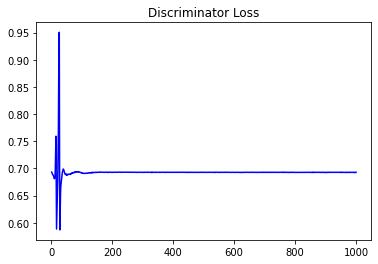

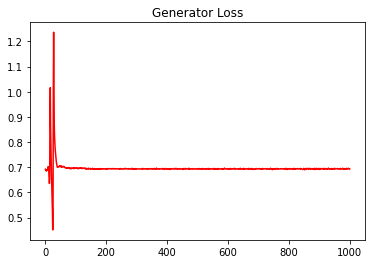

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23060004693124592


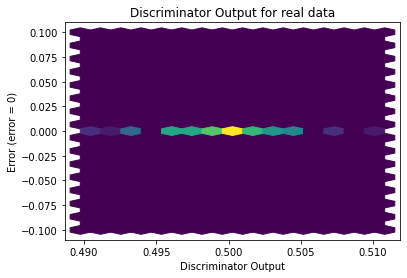

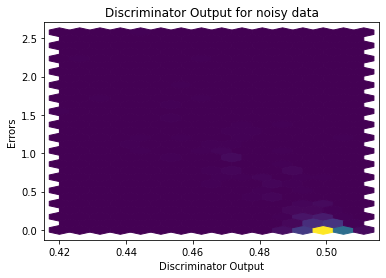

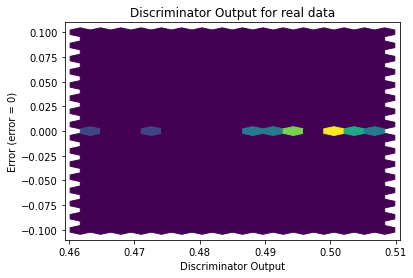

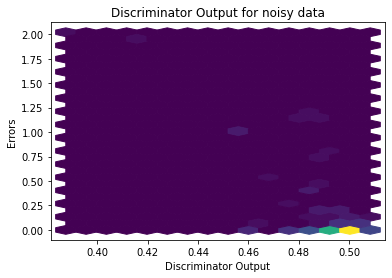

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


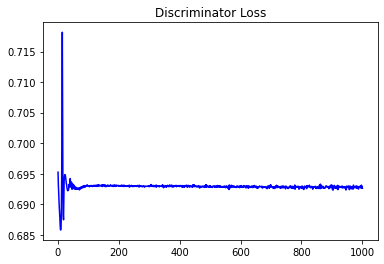

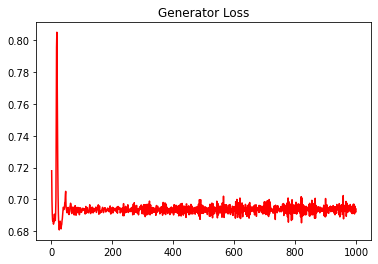

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15598937589219056


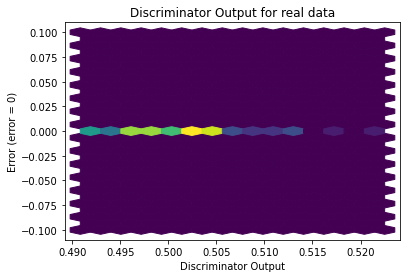

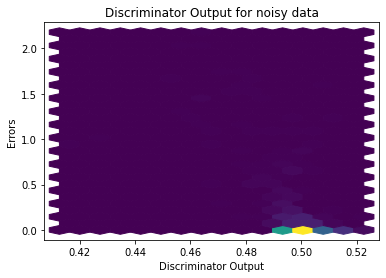

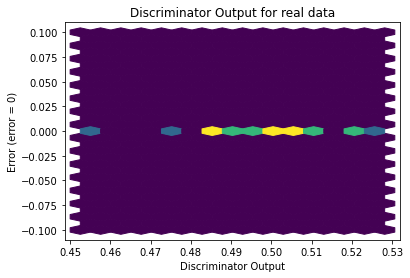

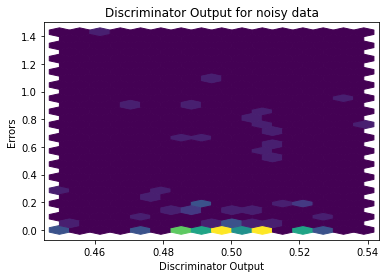

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5955]], requires_grad=True)
